In [1]:
#导入工具包
import numpy as np #Linear algebra
import pandas as pd #data processing ,CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()
%matplotlib inline

## 数据读取


In [2]:
train_data = pd.read_csv("Ames_House_train.csv")
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## 数据基本信息

In [101]:
train_data.shape

(1451, 81)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [103]:
#查看是否有空值
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1360
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

总共有1451个样本
其中有较多空值的数据

Alley            1360

PoolQC           1445

Fence            1171

MiscFeature      1397
都舍弃掉


## 探索数据

查看数据各特征的分布，以及特征之间是否存在相关关系等冗余

In [5]:
#各个属性统计
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


数值型 Id MSSubClass LotF

## 单目标分布分析

/home/danke/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

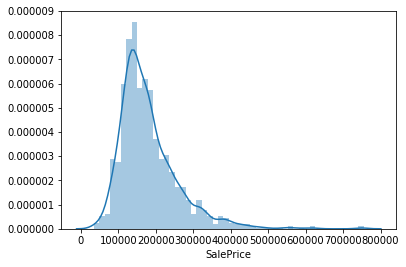

In [6]:
#目标y(salePrice)的直方图or分布
fig=plt.figure()
sns.distplot(train_data.SalePrice.values,bins=50,kde=True)#kde核密度估计
plt.xlabel('SalePrice')
plt.show

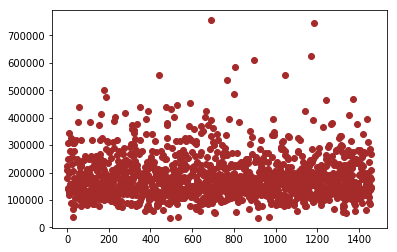

In [7]:
#单个散点图
plt.scatter(range(train_data.shape[0]),train_data['SalePrice'].values,color="brown")

由图可见，数据大部分都分布自100000-300000,分布比较集中

In [9]:
#去除y>500000的值去掉
print(train_data.shape)
train_data = train_data[train_data.SalePrice<500000]
print(train_data.shape)

(1451, 81)
(1451, 81)


## 输入属性的直方图/分布

<function matplotlib.pyplot.show(*args, **kw)>

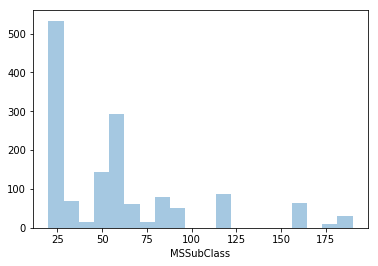

In [106]:
#MSSubClass房地产建筑类别
fig = plt.figure()
sns.distplot(train_data.MSSubClass,bins=20,kde=False)
plt.xlabel('MSSubClass')
plt.show

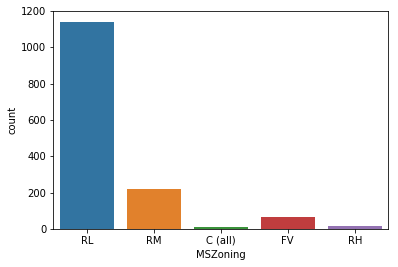

In [108]:
#地区分类
sns.countplot(train_data.MSZoning)

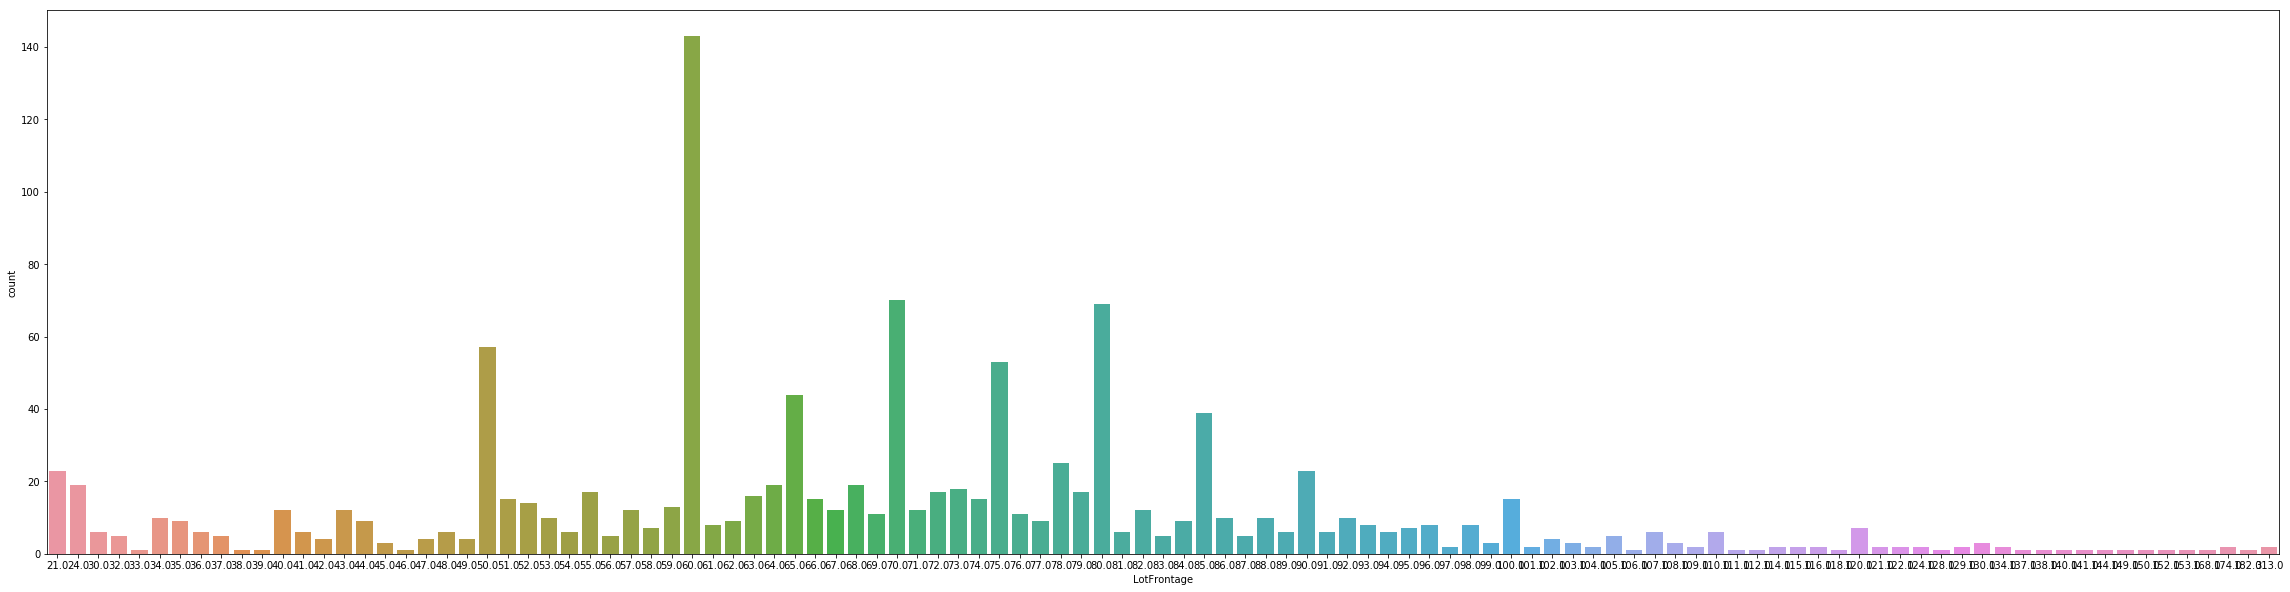

In [117]:
#房屋到街道的直线距离
#sns.distplot(train_data.LotFrontage,kde=True)
fig=plt.figure()
sns.countplot(train_data.LotFrontage)
fig.set_figwidth(40)
fig.set_figheight(10)
#这个离散的数据需要数值化处理吗？

/home/danke/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


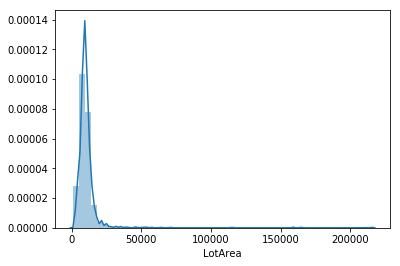

In [126]:
#土地的大小
sns.distplot(train_data.LotArea)

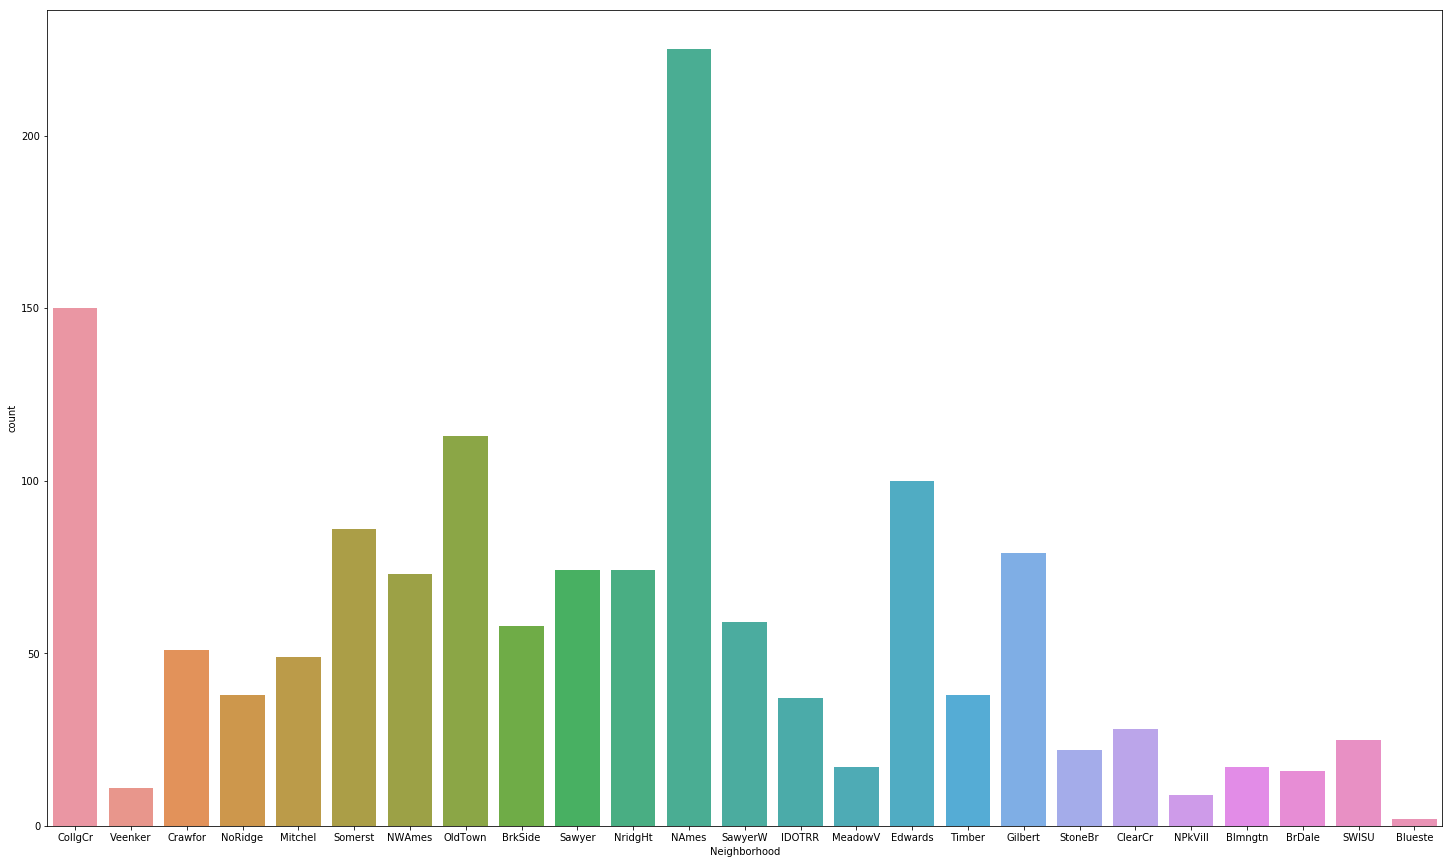

In [131]:
#市区的物理位置
fig=plt.figure()
sns.countplot(train_data.Neighborhood)
fig.set_figwidth(25)
fig.set_figheight(15)

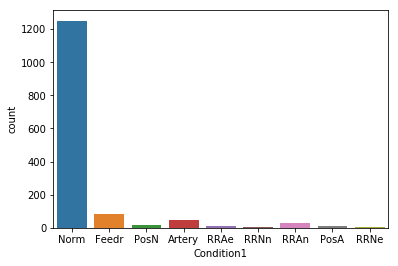

In [136]:
#靠近主干道或铁路
sns.countplot(train_data.Condition1)

/home/danke/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


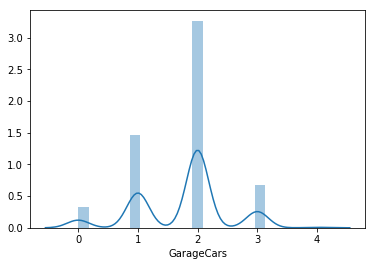

In [138]:
#车库停车数量
sns.distplot(train_data.GarageCars,kde=True)

/home/danke/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


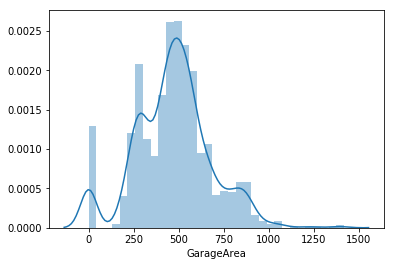

In [139]:
#车库大小
sns.distplot(train_data.GarageArea)

/home/danke/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

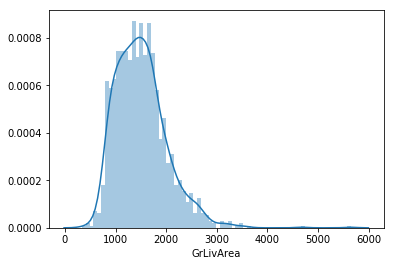

In [141]:
#地上居住面积
fig =plt.figure()
sns.distplot(train_data.GrLivArea,bins=70,kde=True)
plt.show

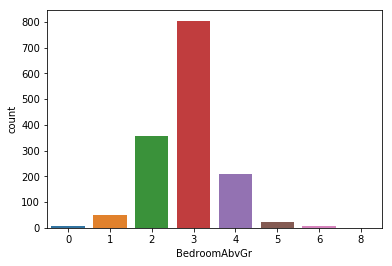

In [143]:
#地上浴室数目
sns.countplot(train_data.BedroomAbvGr)

<function matplotlib.pyplot.show(*args, **kw)>

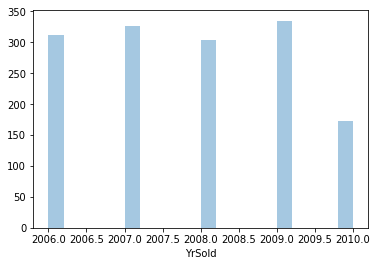

In [144]:
#销售年份
fig =plt.figure()
sns.distplot(train_data.YrSold,bins=20,kde=False)
plt.show

/home/danke/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


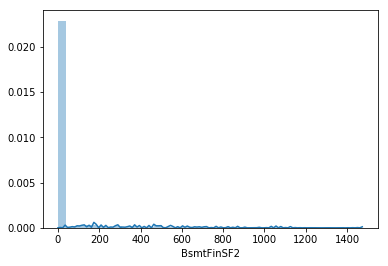

In [146]:
#第一类完成面积
sns.distplot(train_data.BsmtFinSF2)

# 两两特征之间的相关性

In [148]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1360
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

首先要去除一些缺失项多的输入特征,再来对比他们之间的相关度：

Alley            1360

PoolQC           1445

Fence            1171

MiscFeature      1397

In [223]:
#去除数据缺失过多的属性
Ｘ = train_data.drop(columns=['SalePrice','Alley','PoolQC','Fence','MiscFeature'])
X.shape

(1451, 76)

In [224]:
#属性名称
cols=X.columns
#计算相关系数绝对值
X_corr=X.corr().abs()

In [225]:
X_corr.shape

(37, 37)

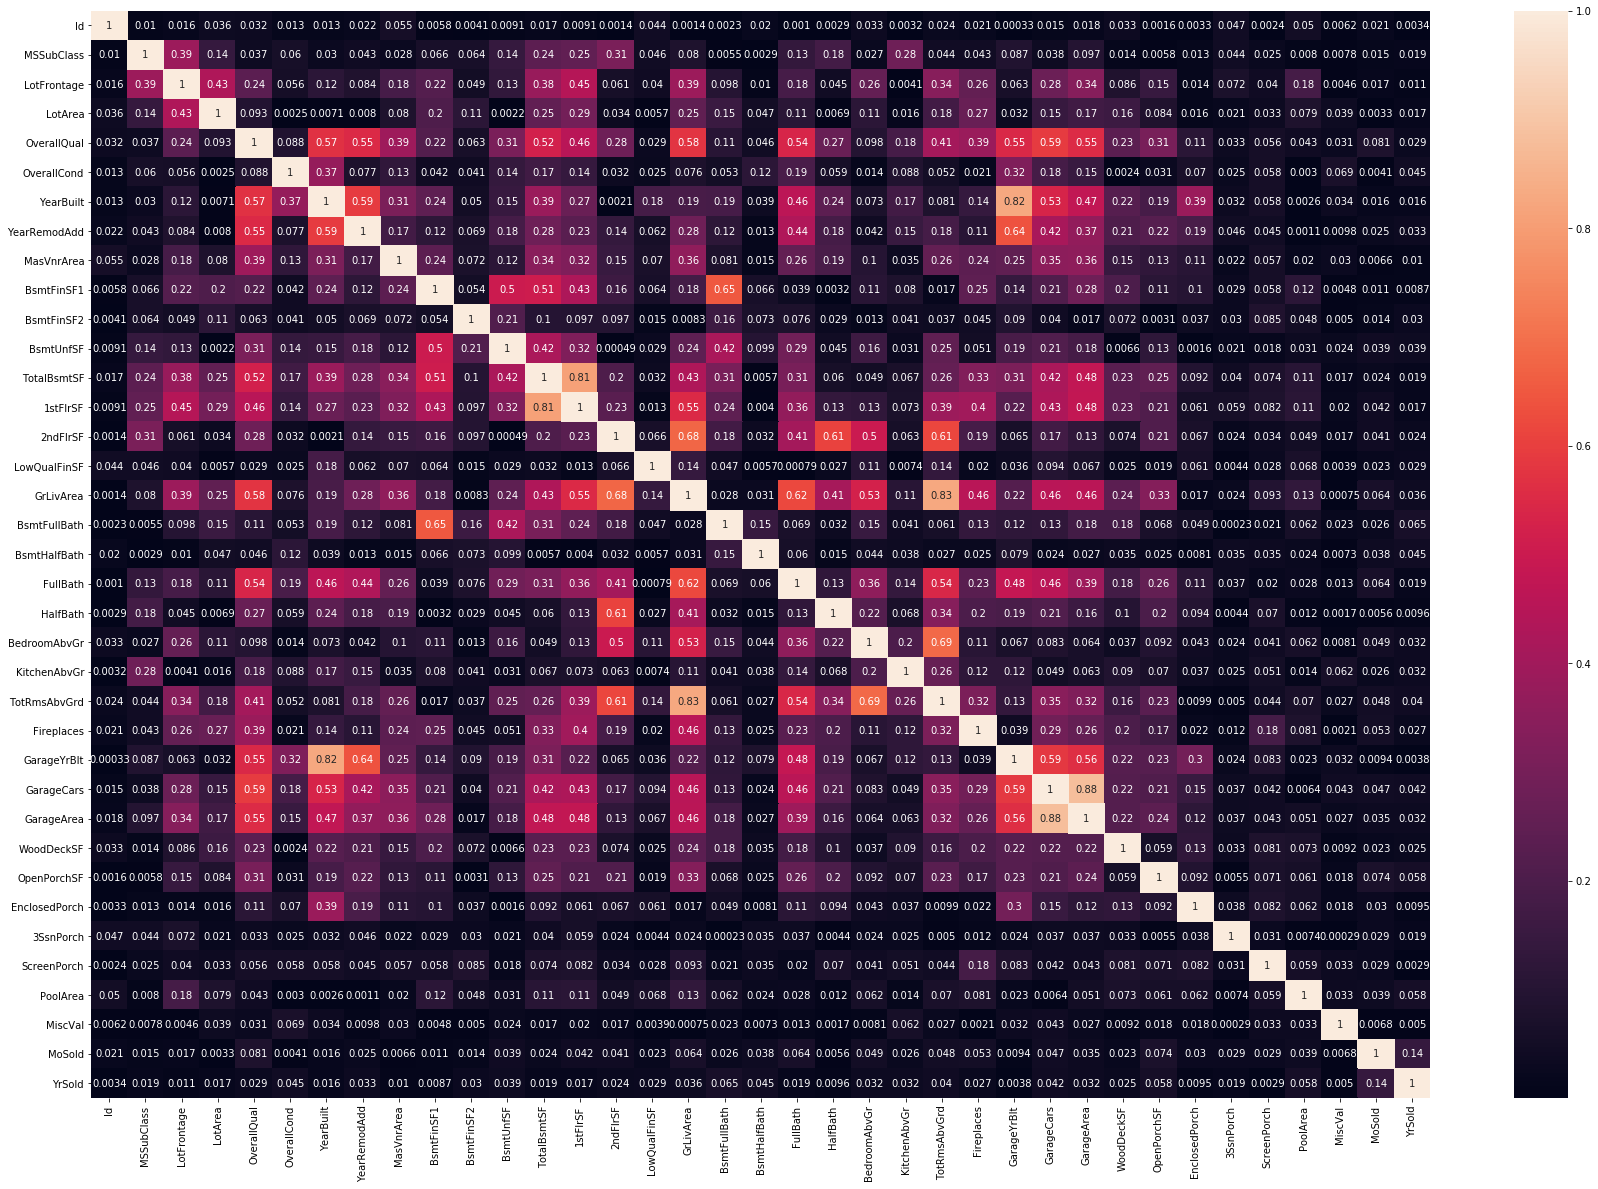

In [226]:
plt.subplots(figsize=(30,20))
sns.heatmap(X_corr,annot=True)
sns.heatmap(X_corr,mask=X_corr<1,cbar=False)

In [227]:
#阈值
threshold=0.5
#强相关系数列表
corr_list=[]
size=X_corr.shape[0]

#找到强相关属性对
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (X_corr.iloc[i,j] >= threshold and X_corr.iloc[i,j] < 1) or (X_corr.iloc[i,j] < 0 and X_corr.iloc[i,j] <= -threshold):
            corr_list.append([X_corr.iloc[i,j],i,j]) 
            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
for v,i,j in s_corr_list:
    print("%s and %s = %.2f"% (cols[i],cols[j],v))


ExterQual and ExterCond = 0.88
OverallQual and Exterior2nd = 0.83
LotShape and MasVnrArea = 0.82
Condition1 and Condition2 = 0.81
RoofMatl and Exterior2nd = 0.69
BldgType and OverallQual = 0.68
LotConfig and OverallCond = 0.65
LandContour and MasVnrArea = 0.64
OverallQual and YearRemodAdd = 0.62
BldgType and Exterior2nd = 0.61
BldgType and RoofStyle = 0.61
LotArea and ExterQual = 0.59
LotShape and LandContour = 0.59
MasVnrArea and ExterQual = 0.59
LotArea and OverallQual = 0.58
LotArea and LotShape = 0.57
MasVnrArea and ExterCond = 0.56
LotArea and ExterCond = 0.55
LotArea and LandContour = 0.55
Condition2 and OverallQual = 0.55
LotArea and MasVnrArea = 0.55
YearRemodAdd and Exterior2nd = 0.54
LotArea and YearRemodAdd = 0.54
LotShape and ExterQual = 0.53
OverallQual and RoofMatl = 0.53
LotArea and Condition1 = 0.52
LotConfig and Condition1 = 0.51
LotConfig and Neighborhood = 0.50


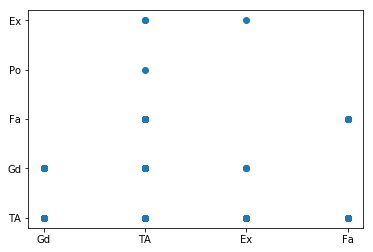

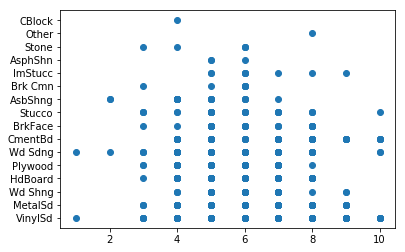

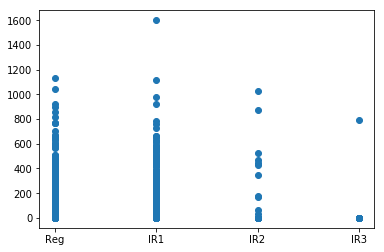

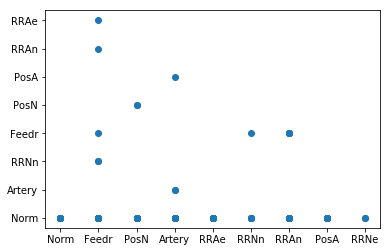

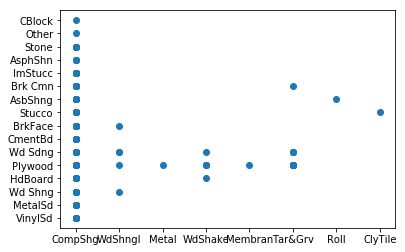

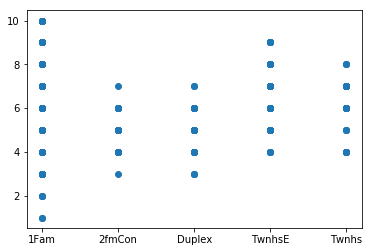

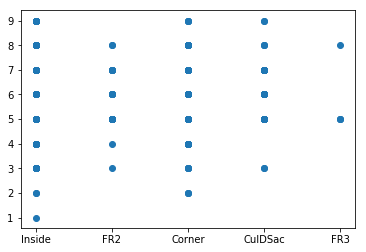

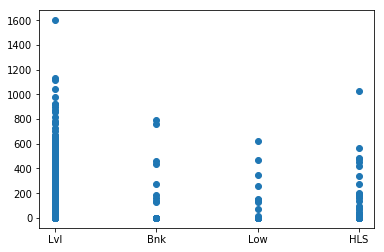

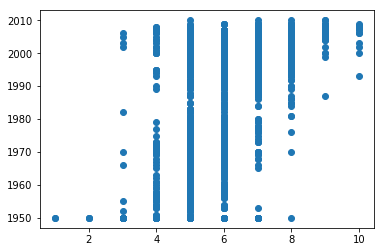

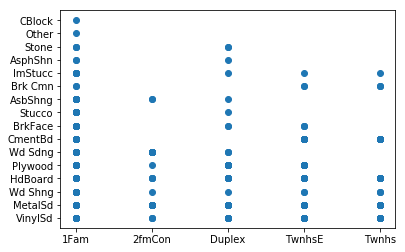

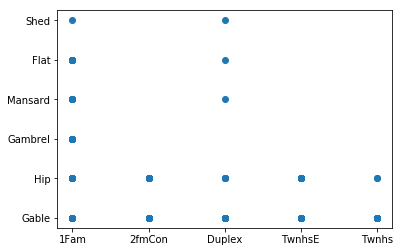

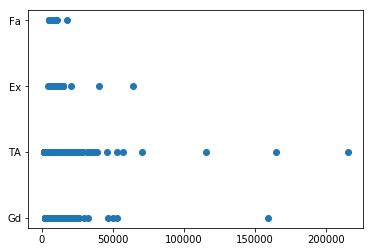

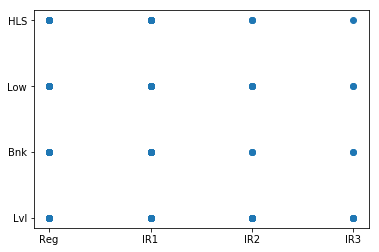

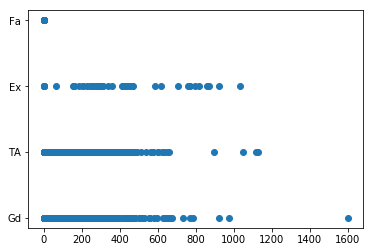

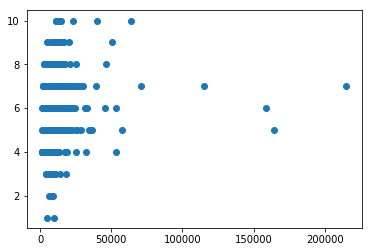

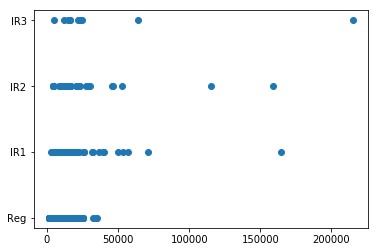

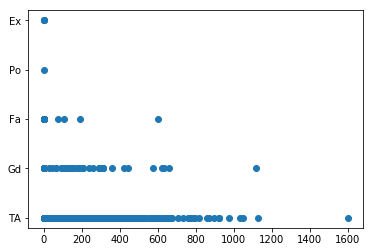

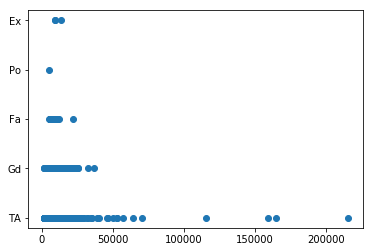

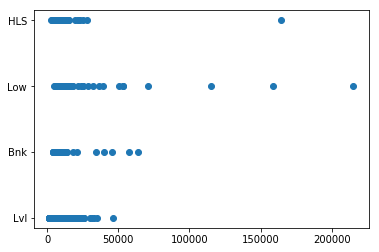

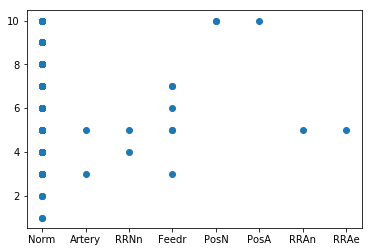

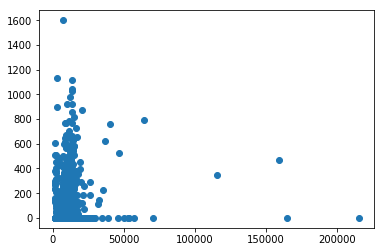

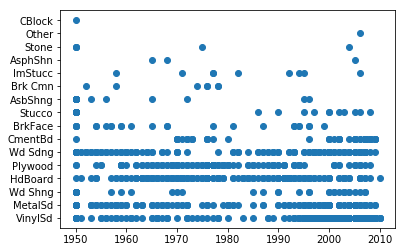

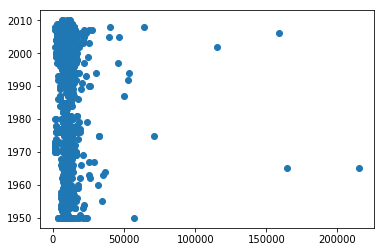

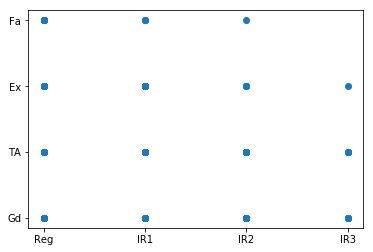

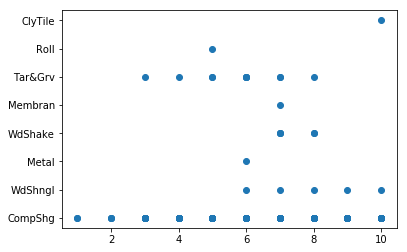

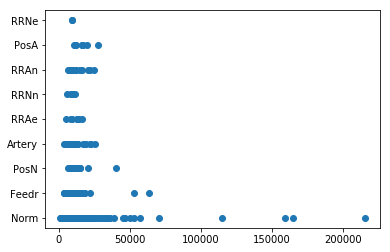

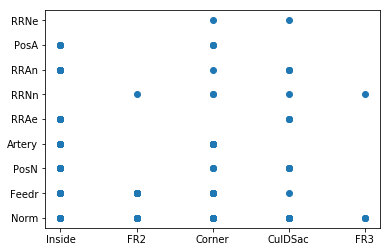

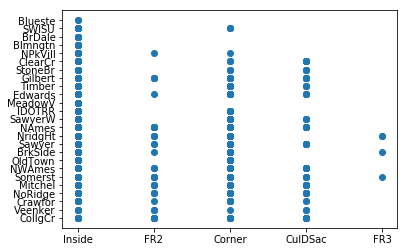

In [228]:
#强相关属性的散点图
for v,i,j in s_corr_list:
    plt.scatter(x=X[cols[i]],y=X[cols[j]])
    #sns.pairplot(X,size=6,x_vars=cols[i],y_vars=cols[j])
    plt.show()